In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ['XLA_FLAGS'] = f"--xla_gpu_cuda_data_dir={os.environ['CONDA_PREFIX']}/lib/"

# Sample Midterm Exam: RNN

## Context
As the lead data scientist at Monte Carlo Strings (MCS), an affiliate of MonteChristo Holdings based in Cebu, Philippines, you have been tasked with analyzing the performance of global guitar sales. MCS has provided a comprehensive dataset spanning four years, from 2020 April to 2024 April, detailing their sales operations.

### Dataset Description
The dataset includes several components crucial for conducting detailed sales analysis:

- **Date**: Specifies the exact day of each transaction.
- **Daily Sales**: Records the number of guitars sold on each day.
- **Day of the Week**: Indicates the day of the week on which the transaction occurred.
- **Month of the Year**: Identifies the month during which the sale was made.
- **Holidays**: Lists the days recognized as official holidays in the Philippine calendar, potentially impacting sales trends.
- **Average GDP per Capita in the Philippines (Quarterly)**: This economic indicator, updated quarterly, may influence consumer purchasing patterns.
- **Daily Tourist Visits to the Philippines**: Reflects the potential impact of tourism on daily sales, given that a significant number of guitar purchasers are tourists.

### Project Objective
The objective of MCS is to develop a robust predictive model capable of forecasting future guitar sales up to 28 days ahead. This project focuses on a **univariate time series analysis**, utilizing only the daily sales data to predict future trends. The model specifications of their current model are as follows:

- **Model Type**: Gated Recurrent Unit (GRU)
- **Configuration**: 32 hidden nodes, a window size of 7 days, and a linear activation function in the output layer.

### Model Evaluation
The model's accuracy is evaluated using the test dataset, which comprises the final 121 data points corresponding to January through April 2024. The remainder of the dataset serves as the training set.

### Implementation Code
Below is a snippet of the Python (Keras) code utilized by MCS to construct their basic forecasting model based on the specifications outlined:

```python
window_size = 7
forecast_horizon = 28  # Forecasting 28 days into the future
X, y = create_sequences(scaled_sales, window_size, forecast_horizon)

# Split the data into training and testing sets
split_time = len(X) - 120  # Using the last 4 months as the test set
X_train, X_test = X[:split_time], X[split_time:]
y_train, y_test = y[:split_time], y[split_time:]

# Build the GRU model
model = Sequential([
    GRU(32, input_shape=(window_size, 1), activation='linear'),
    Dense(1, activation='linear')  # Output one value
])
model.compile(optimizer='adam', loss='mean_squared_error')
```

In [2]:
data_path = 'data/Guitar_Sales_Dataset.xlsx'

df = pd.read_excel(data_path)

In [3]:
df.head()

,Date,Day of the Week,Month of the Year,Daily Sales,Holidays,Average GDP per capita in the Philippines (quarterly),Daily Tourist Visits to the Philippines
0,2020-04-01,Wednesday,4,171,False,3060.0,3219
1,2020-04-02,Thursday,4,180,False,3060.0,3388
2,2020-04-03,Friday,4,212,False,3060.0,3991
3,2020-04-04,Saturday,4,234,False,3060.0,4405
4,2020-04-05,Sunday,4,239,False,3060.0,4499


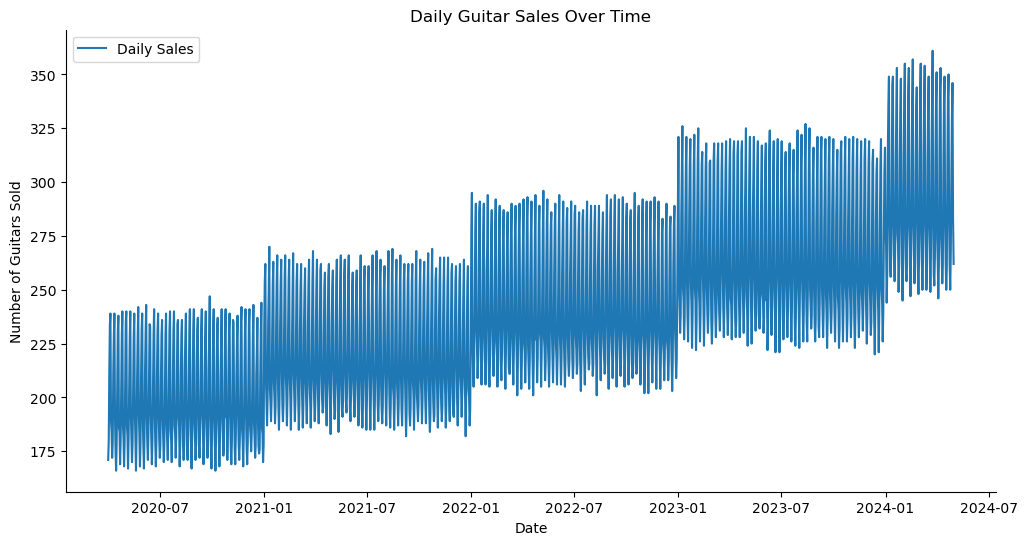

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['Date'], df['Daily Sales'], label='Daily Sales')
ax.set_title('Daily Guitar Sales Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Guitars Sold')
ax.spines[['top', 'right']].set_visible(False)
ax.legend();

## Task 1

<div class="alert alert-block alert-info">

Implement a Naive baseline method.

**Evaluation Metrics**:
- **Mean Absolute Percentage Error (MAPE)**
- **Mean Absolute Error (MAE)**

Compare the naive baseline’s performance to the MCS team’s reported accuracy: an MAE of 10 guitars and a MAPE of 3.42%.


*Rubric*
- **1pt** Correct implementation of Naive method.
- **1pt** MAPE and MAE are within a reasonable range

</div>

In [5]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [6]:
num_test = 121
ahead = 28

y_test = df.loc[:, ["Date", "Daily Sales"]].iloc[-num_test:]
naive_pred = df.loc[:, ['Date', 'Daily Sales']].iloc[-(num_test + ahead):-ahead]

In [7]:
def compute_model_performance(actual, predicted, model_name):
    model_performances = []
    metrics = {'MAE': mean_absolute_error,
               'MAPE': mean_absolute_percentage_error}

    for metric in metrics:
        model_performances.append(
            {'Model': model_name,
             'Metric': metric,
             'Value': metrics[metric](
                 actual, predicted)}
        )

    return pd.DataFrame(model_performances).pivot(
        columns='Metric', values='Value', index='Model')

In [8]:
naive_performance = compute_model_performance(
    y_test['Daily Sales'], naive_pred['Daily Sales'], 'Naive')

In [9]:
naive_performance

Metric,MAE,MAPE
Model,,
Naive,9.504132,0.032435


## Task 2

<div class="alert alert-block alert-info">

Replicate the basic predictive model developed by MCS using a Gated Recurrent Unit (GRU) in Keras or PyTorch. Your model should forecast guitar sales 28 days into the future.

**Evaluation Metrics**:
- **Mean Absolute Percentage Error (MAPE)**
- **Mean Absolute Error (MAE)**

Compare the replicated model’s performance to the MCS team’s reported accuracy: an MAE of 10 guitars and a MAPE of 3.42%.

*Rubric*
- **2pts** Correct implementation of GRU, train-test code
- **1pts** MAPE is within a reasonable range
- **1pts** MAE is within a reasonable range

</div>

In [10]:
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [11]:
# Get predictors and target dataframes
predictors = df.set_index('Date')
target = predictors['Daily Sales']

In [12]:
predictors.head()

,Day of the Week,Month of the Year,Daily Sales,Holidays,Average GDP per capita in the Philippines (quarterly),Daily Tourist Visits to the Philippines
Date,,,,,,
2020-04-01,Wednesday,4,171,False,3060.0,3219
2020-04-02,Thursday,4,180,False,3060.0,3388
2020-04-03,Friday,4,212,False,3060.0,3991
2020-04-04,Saturday,4,234,False,3060.0,4405
2020-04-05,Sunday,4,239,False,3060.0,4499


In [13]:
# Separate categorical and numerical features
cat_cols = ['Day of the Week', 'Month of the Year', 'Holidays']

numerical_predictors = predictors.loc[:, ~predictors.columns.isin(cat_cols)]
categorical_predictors = predictors.loc[:, ~predictors.columns.isin(cat_cols)]

In [14]:
numerical_predictors.head()

,Daily Sales,Average GDP per capita in the Philippines (quarterly),Daily Tourist Visits to the Philippines
Date,,,
2020-04-01,171,3060.0,3219
2020-04-02,180,3060.0,3388
2020-04-03,212,3060.0,3991
2020-04-04,234,3060.0,4405
2020-04-05,239,3060.0,4499


In [15]:
# Get predictors for basic GRU model
basic_predictors = numerical_predictors.loc[:, ['Daily Sales']]
X_basic = basic_predictors.to_numpy()

### Feature Scaling

In [16]:
# Specify number of points per split for proper data segregation and scaling
num_trainval = len(df) - num_test
num_val = int(0.20*num_trainval)
num_train = len(df) - (num_test + num_val)

In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_basic[:num_train])
X_basic_scaled = scaler.transform(X_basic)

### Generating the Time-series Dataset

In [18]:
from tensorflow import keras

In [19]:
# Configuration parameters
sampling_rate = 1 # data is already sampled per day, thus this is 1
ahead = 28 # number of days ahead to forecast
sequence_length = 7 # how many days in history to use as predictors
target_delay = sampling_rate * (sequence_length + ahead - 1) # start index that can be included in targets
last_predictor_index = sampling_rate * (ahead) # last index (negative) that can be used as predictor
batch_size = 256

In [20]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    X_basic_scaled[:-last_predictor_index],
    targets=X_basic_scaled[:, 0][target_delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    X_basic_scaled[:-last_predictor_index],
    targets=X_basic_scaled[:, 0][target_delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train,
    end_index=num_train + num_val
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    X_basic_scaled[:-last_predictor_index],
    targets=X_basic_scaled[:, 0][target_delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train + num_val
)

### Model Creation

In [21]:
from tensorflow.keras import layers

In [22]:
def make_basic_model():
    inputs = keras.Input(shape=(sequence_length, 1))

    x = layers.GRU(32, activation='linear')(inputs)

    outputs = layers.Dense(1, activation='linear')(x)

    return keras.Model(inputs, outputs)

In [23]:
basic_model = make_basic_model()

In [24]:
basic_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


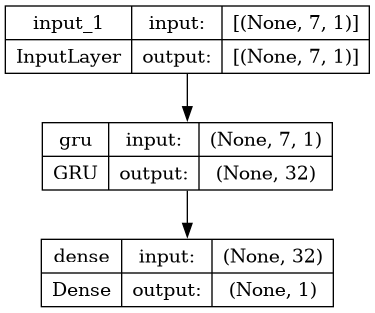

In [25]:
keras.utils.plot_model(basic_model, show_shapes=True)

### Model Training

In [26]:
# Compile with corresponding metrics
basic_model.compile(optimizer='adam', loss='mse',
                    metrics=['mae', 'mape', 'mse'])

In [27]:
# Set callbacks
basic_model_filepath = 'models/basic_model.tf'
callbacks = [
    keras.callbacks.ModelCheckpoint(basic_model_filepath, save_best_only=True)
]

In [28]:
history = basic_model.fit(
    train_dataset, epochs=40, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.4269 - mape: 35326.4336 - mse: 0.2517


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 5s 570ms/step - loss: 0.2517 - mae: 0.4269 - mape: 35326.4336 - mse: 0.2517 - val_loss: 0.3027 - val_mae: 0.4058 - val_mape: 101.2263 - val_mse: 0.3027
Epoch 2/40
5/5 [==============================] - 0s 60ms/step - loss: 0.2019 - mae: 0.3818 - mape: 110987.3828 - mse: 0.2019 - val_loss: 0.3124 - val_mae: 0.4098 - val_mape: 106.4560 - val_mse: 0.3124
Epoch 3/40
5/5 [==============================] - 0s 55ms/step - loss: 0.1703 - mae: 0.3488 - mape: 184802.5312 - mse: 0.1703 - val_loss: 0.3212 - val_mae: 0.4173 - val_mape: 115.7995 - val_mse: 0.3212
Epoch 4/40
5/5 [==============================] - 0s 57ms/step - loss: 0.1519 - mae: 0.3286 - mape: 298984.5625 - mse: 0.1519 - val_loss: 0.3217 - val_mae: 0.4189 - val_mape: 119.6769 - val_mse: 0.3217
Epoch 5/40
5/5 [==============================] - 0s 54ms/step - loss: 0.1421 - mae: 0.3132 - mape: 339681.9375 - mse: 0.1421 - val_loss: 0.3079 - val_mae: 0.4094 - val_mape: 114.8914 - val_mse: 0.3079
E

INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 370ms/step - loss: 0.1342 - mae: 0.3036 - mape: 361009.9375 - mse: 0.1342 - val_loss: 0.2821 - val_mae: 0.3911 - val_mape: 106.5161 - val_mse: 0.2821
Epoch 7/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2952 - mape: 524691.3125 - mse: 0.1242 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 369ms/step - loss: 0.1241 - mae: 0.2955 - mape: 369723.3750 - mse: 0.1241 - val_loss: 0.2504 - val_mae: 0.3700 - val_mape: 102.5942 - val_mse: 0.2504
Epoch 8/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2874 - mape: 379401.4688 - mse: 0.1138


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 429ms/step - loss: 0.1138 - mae: 0.2874 - mape: 379401.4688 - mse: 0.1138 - val_loss: 0.2228 - val_mae: 0.3540 - val_mape: 107.3202 - val_mse: 0.2228
Epoch 9/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2814 - mape: 108.3557 - mse: 0.1072


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 355ms/step - loss: 0.1055 - mae: 0.2799 - mape: 407269.0000 - mse: 0.1055 - val_loss: 0.2007 - val_mae: 0.3420 - val_mape: 114.2073 - val_mse: 0.2007
Epoch 10/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2730 - mape: 446777.1250 - mse: 0.0989


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 354ms/step - loss: 0.0981 - mae: 0.2718 - mape: 419729.7500 - mse: 0.0981 - val_loss: 0.1838 - val_mae: 0.3326 - val_mape: 120.5421 - val_mse: 0.1838
Epoch 11/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2629 - mape: 295039.3125 - mse: 0.0914


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 346ms/step - loss: 0.0909 - mae: 0.2624 - mape: 448985.3125 - mse: 0.0909 - val_loss: 0.1710 - val_mae: 0.3249 - val_mape: 125.8638 - val_mse: 0.1710
Epoch 12/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2532 - mape: 192474.2656 - mse: 0.0846


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 365ms/step - loss: 0.0838 - mae: 0.2520 - mape: 469801.4688 - mse: 0.0838 - val_loss: 0.1613 - val_mae: 0.3185 - val_mape: 130.0823 - val_mse: 0.1613
Epoch 13/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2412 - mape: 493416.7500 - mse: 0.0770


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 456ms/step - loss: 0.0770 - mae: 0.2412 - mape: 493416.7500 - mse: 0.0770 - val_loss: 0.1521 - val_mae: 0.3116 - val_mape: 133.0513 - val_mse: 0.1521
Epoch 14/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2303 - mape: 501291.0938 - mse: 0.0708


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 352ms/step - loss: 0.0708 - mae: 0.2303 - mape: 501291.0938 - mse: 0.0708 - val_loss: 0.1424 - val_mae: 0.3037 - val_mape: 135.3565 - val_mse: 0.1424
Epoch 15/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2203 - mape: 536705.8750 - mse: 0.0653


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 356ms/step - loss: 0.0648 - mae: 0.2195 - mape: 504213.1875 - mse: 0.0648 - val_loss: 0.1325 - val_mae: 0.2946 - val_mape: 136.7218 - val_mse: 0.1325
Epoch 16/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.2082 - mape: 511155.4375 - mse: 0.0590


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 361ms/step - loss: 0.0590 - mae: 0.2082 - mape: 511155.4375 - mse: 0.0590 - val_loss: 0.1229 - val_mae: 0.2851 - val_mape: 137.2523 - val_mse: 0.1229
Epoch 17/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1967 - mape: 504936.4062 - mse: 0.0534


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 381ms/step - loss: 0.0534 - mae: 0.1967 - mape: 504936.4062 - mse: 0.0534 - val_loss: 0.1135 - val_mae: 0.2750 - val_mape: 137.4110 - val_mse: 0.1135
Epoch 18/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1832 - mape: 705114.1875 - mse: 0.0474


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 509ms/step - loss: 0.0481 - mae: 0.1848 - mape: 496837.9375 - mse: 0.0481 - val_loss: 0.1047 - val_mae: 0.2649 - val_mape: 137.5223 - val_mse: 0.1047
Epoch 19/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1728 - mape: 495067.3125 - mse: 0.0431


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 403ms/step - loss: 0.0431 - mae: 0.1728 - mape: 495067.3125 - mse: 0.0431 - val_loss: 0.0985 - val_mae: 0.2568 - val_mape: 137.1586 - val_mse: 0.0985
Epoch 20/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1608 - mape: 526579.2500 - mse: 0.0383


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 360ms/step - loss: 0.0382 - mae: 0.1605 - mape: 494700.0312 - mse: 0.0382 - val_loss: 0.0922 - val_mae: 0.2480 - val_mape: 136.3271 - val_mse: 0.0922
Epoch 21/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1487 - mape: 520370.1875 - mse: 0.0337 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 361ms/step - loss: 0.0339 - mae: 0.1486 - mape: 488864.8438 - mse: 0.0339 - val_loss: 0.0855 - val_mae: 0.2387 - val_mape: 135.4269 - val_mse: 0.0855
Epoch 22/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1357 - mape: 364239.3438 - mse: 0.0295


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 367ms/step - loss: 0.0297 - mae: 0.1371 - mape: 470820.8125 - mse: 0.0297 - val_loss: 0.0774 - val_mae: 0.2268 - val_mape: 133.3757 - val_mse: 0.0774
Epoch 23/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1270 - mape: 499030.1250 - mse: 0.0260


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 468ms/step - loss: 0.0261 - mae: 0.1271 - mape: 468816.3438 - mse: 0.0261 - val_loss: 0.0703 - val_mae: 0.2155 - val_mape: 130.7611 - val_mse: 0.0703
Epoch 24/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1176 - mape: 474203.3750 - mse: 0.0232 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 368ms/step - loss: 0.0228 - mae: 0.1168 - mape: 445492.4688 - mse: 0.0228 - val_loss: 0.0648 - val_mae: 0.2060 - val_mape: 128.5589 - val_mse: 0.0648
Epoch 25/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.1088 - mape: 616200.5625 - mse: 0.0209


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 352ms/step - loss: 0.0199 - mae: 0.1058 - mape: 434181.9062 - mse: 0.0199 - val_loss: 0.0602 - val_mae: 0.1975 - val_mape: 126.4305 - val_mse: 0.0602
Epoch 26/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0988 - mape: 450799.2812 - mse: 0.0180


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 356ms/step - loss: 0.0177 - mae: 0.0975 - mape: 423505.2188 - mse: 0.0177 - val_loss: 0.0536 - val_mae: 0.1847 - val_mape: 122.7807 - val_mse: 0.0536
Epoch 27/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0908 - mape: 550516.1875 - mse: 0.0154 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 362ms/step - loss: 0.0157 - mae: 0.0917 - mape: 387900.8750 - mse: 0.0157 - val_loss: 0.0478 - val_mae: 0.1727 - val_mape: 119.3450 - val_mse: 0.0478
Epoch 28/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0887 - mape: 387717.1875 - mse: 0.0146


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 460ms/step - loss: 0.0145 - mae: 0.0881 - mape: 364243.1250 - mse: 0.0145 - val_loss: 0.0426 - val_mae: 0.1610 - val_mape: 115.3279 - val_mse: 0.0426
Epoch 29/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0845 - mape: 383313.4688 - mse: 0.0135 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 356ms/step - loss: 0.0136 - mae: 0.0847 - mape: 360105.3125 - mse: 0.0136 - val_loss: 0.0384 - val_mae: 0.1505 - val_mape: 111.7913 - val_mse: 0.0384
Epoch 30/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0836 - mape: 349098.1875 - mse: 0.0129


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 370ms/step - loss: 0.0129 - mae: 0.0836 - mape: 349098.1875 - mse: 0.0129 - val_loss: 0.0345 - val_mae: 0.1400 - val_mape: 108.8839 - val_mse: 0.0345
Epoch 31/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0810 - mape: 351993.8438 - mse: 0.0124


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 360ms/step - loss: 0.0124 - mae: 0.0810 - mape: 351993.8438 - mse: 0.0124 - val_loss: 0.0330 - val_mae: 0.1355 - val_mape: 107.4179 - val_mse: 0.0330
Epoch 32/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0792 - mape: 394126.6250 - mse: 0.0124 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 438ms/step - loss: 0.0121 - mae: 0.0781 - mape: 370263.5938 - mse: 0.0121 - val_loss: 0.0308 - val_mae: 0.1289 - val_mape: 104.9730 - val_mse: 0.0308
Epoch 33/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0767 - mape: 109895.9922 - mse: 0.0116


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 355ms/step - loss: 0.0117 - mae: 0.0771 - mape: 366945.3438 - mse: 0.0117 - val_loss: 0.0295 - val_mae: 0.1250 - val_mape: 102.4311 - val_mse: 0.0295
Epoch 34/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0762 - mape: 279370.2500 - mse: 0.0115


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 351ms/step - loss: 0.0114 - mae: 0.0761 - mape: 368110.3750 - mse: 0.0114 - val_loss: 0.0287 - val_mae: 0.1224 - val_mape: 99.8311 - val_mse: 0.0287
Epoch 35/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0752 - mape: 512166.1562 - mse: 0.0114


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 371ms/step - loss: 0.0112 - mae: 0.0742 - mape: 360878.6875 - mse: 0.0112 - val_loss: 0.0280 - val_mae: 0.1198 - val_mape: 97.0794 - val_mse: 0.0280
Epoch 36/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0736 - mape: 494378.2188 - mse: 0.0108


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 366ms/step - loss: 0.0109 - mae: 0.0742 - mape: 348348.5312 - mse: 0.0109 - val_loss: 0.0272 - val_mae: 0.1173 - val_mape: 94.6719 - val_mse: 0.0272
Epoch 37/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0732 - mape: 338383.6562 - mse: 0.0107 


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 454ms/step - loss: 0.0107 - mae: 0.0732 - mape: 338383.6562 - mse: 0.0107 - val_loss: 0.0268 - val_mae: 0.1158 - val_mape: 93.0431 - val_mse: 0.0268
Epoch 38/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0731 - mape: 350200.7188 - mse: 0.0107


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 385ms/step - loss: 0.0105 - mae: 0.0727 - mape: 328998.3750 - mse: 0.0105 - val_loss: 0.0263 - val_mae: 0.1140 - val_mape: 91.3925 - val_mse: 0.0263
Epoch 39/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0710 - mape: 329832.2188 - mse: 0.0104


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 355ms/step - loss: 0.0104 - mae: 0.0710 - mape: 329832.2188 - mse: 0.0104 - val_loss: 0.0262 - val_mae: 0.1136 - val_mape: 90.2270 - val_mse: 0.0262
Epoch 40/40
INFO:tensorflow:Assets written to: models/basic_model.tf/assets mae: 0.0709 - mape: 319397.4375 - mse: 0.0102


INFO:tensorflow:Assets written to: models/basic_model.tf/assets


5/5 [==============================] - 2s 364ms/step - loss: 0.0102 - mae: 0.0709 - mape: 319397.4375 - mse: 0.0102 - val_loss: 0.0251 - val_mae: 0.1100 - val_mape: 88.5151 - val_mse: 0.0251


In [29]:
def plot_history(history, metric='mae'):
    loss = history.history[metric]
    val_loss = history.history[f'val_{metric}']
    epochs = range(1, len(loss) + 1)

    fig, ax = plt.subplots()

    ax.plot(epochs, loss, 'o', color='tab:blue', label=f'Training {metric.upper()}')
    ax.plot(epochs, val_loss, color='tab:blue', label=f'Validation {metric.upper()}')
    ax.legend(loc='upper left', bbox_to_anchor=(1., 1.))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Absolute Error")
    ax.spines[['top', 'right']].set_visible(False)

    return fig, ax

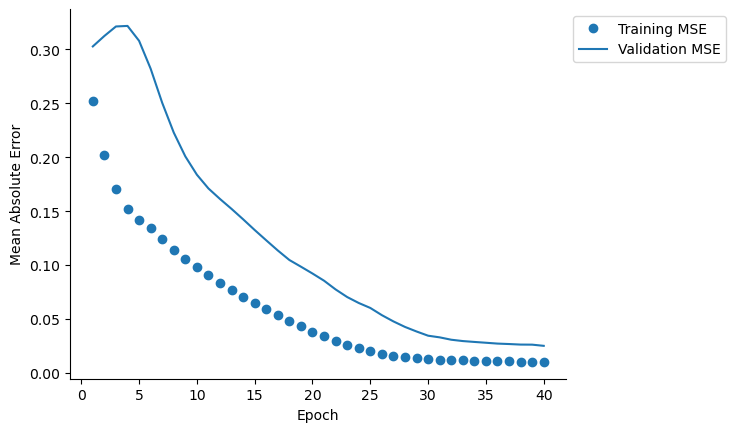

In [30]:
plot_history(history, 'mse');

### Model Evaluation

In [31]:
basic_model = keras.saving.load_model(basic_model_filepath)

In [32]:
def get_actuals_and_predictions(model, test_dataset, scaler):
    actuals = []
    predictions = []

    for samples, targets in test_dataset:
        actuals.extend(targets)
        predictions.extend(model.predict(samples))

    # Convert to normal array with float values
    actuals = np.array([float(actual) for actual in actuals])
    predictions = np.array([float(target) for target in predictions])

    # Perform inverse scaling
    actuals = scaler.inverse_transform(actuals[:, np.newaxis]).flatten()
    predictions = scaler.inverse_transform(predictions[:, np.newaxis]).flatten()

    return actuals, predictions

In [33]:
actuals, basic_predictions = get_actuals_and_predictions(
    basic_model, test_dataset, scaler)

3/3 [==============================] - 0s 6ms/step


/tmp/ipykernel_176396/3731936889.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions = np.array([float(target) for target in predictions])


In [34]:
basic_performance = compute_model_performance(
    actuals, basic_predictions, 'Basic GRU')

In [35]:
pd.concat((naive_performance, basic_performance))

Metric,MAE,MAPE
Model,,
Naive,9.504132,0.032435
Basic GRU,11.365637,0.035934


## Task 3

<div class="alert alert-block alert-info">

Plot the predictions from your GRU model against the actual sales data for the test set. This visualization should clearly distinguish between forecasted and actual values.


*Rubric*
- **2pts** Results that correctly reflect forecasted vs. actual values
- **1pts** Plot with correct visual elements (labels, lines, axes, colors, etc.)

</div>

In [36]:
def plot_predictions(actual, predicted, dates):
    fig, ax = plt.subplots()
    ax.plot(dates, actual, color='tab:blue', label='Actual')
    ax.plot(dates, predicted, '--', color='tab:orange', label='Predicted')

    ax.legend(bbox_to_anchor=(1., 1.))
    ax.set_xlabel("Dates")
    ax.set_ylabel("Number of Guitar Sales")
    ax.spines[['top', 'right']].set_visible(False)
    plt.xticks(rotation=45, ha='right')

    return fig, ax

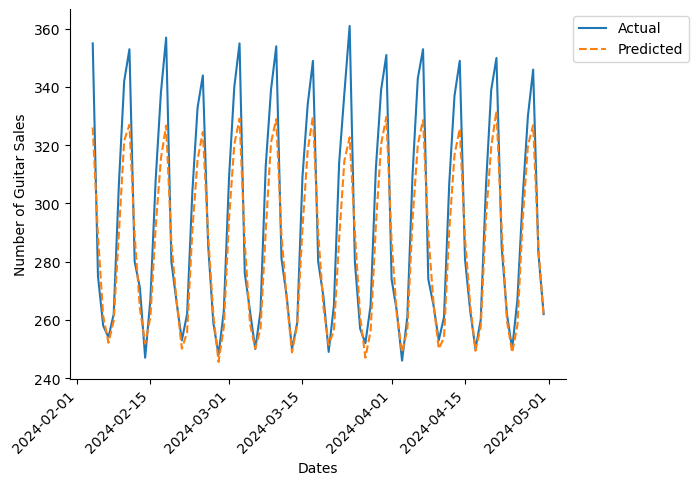

In [37]:
plot_predictions(actuals, basic_predictions,
                 df.Date[-len(basic_predictions):]);

## Task 4

<div class="alert alert-block alert-info">

Develop an improved model outperforming the baseline GRU model specified in Problem 3A. Focus on enhancing the accuracy, as measured by MAPE and MAE.


*Rubric*
- **3pts** Correct implementation of an improved model
- **1pts** Model performs noticeably better (both MAPE, MAE) than the GRU from Task 2
</div>

### Model Creation

In [38]:
def make_improved_model():
    inputs = keras.Input(shape=(sequence_length, 1))

    x = layers.GRU(64, return_sequences=True)(inputs)
    x = layers.GRU(64)(x)

    outputs = layers.Dense(1, activation='linear')(x)

    return keras.Model(inputs, outputs)

In [39]:
improved_model = make_improved_model()

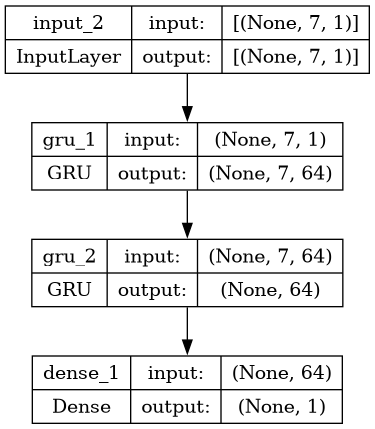

In [40]:
keras.utils.plot_model(improved_model, show_shapes=True)

### Model Training

In [41]:
improved_model.compile(optimizer='rmsprop', loss='mse',
                       metrics=['mae', 'mape', 'mse'])

In [42]:
improved_model_filepath = 'models/improved_model.tf'
callbacks = [
    keras.callbacks.ModelCheckpoint(improved_model_filepath, save_best_only=True)
]

In [43]:
improved_history = improved_model.fit(
    train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.3578 - mape: 329846.0625 - mse: 0.1768


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 9s 1s/step - loss: 0.1768 - mae: 0.3578 - mape: 329846.0625 - mse: 0.1768 - val_loss: 0.2359 - val_mae: 0.3704 - val_mape: 113.2533 - val_mse: 0.2359
Epoch 2/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.3073 - mape: 1203153.8750 - mse: 0.1236


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.1236 - mae: 0.3095 - mape: 427867.6250 - mse: 0.1236 - val_loss: 0.1773 - val_mae: 0.3473 - val_mape: 155.6091 - val_mse: 0.1773
Epoch 3/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.2931 - mape: 1407844.3750 - mse: 0.1064


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0995 - mae: 0.2847 - mape: 585973.8125 - mse: 0.0995 - val_loss: 0.1280 - val_mae: 0.3099 - val_mape: 174.7401 - val_mse: 0.1280
Epoch 4/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.2534 - mape: 102.3177 - mse: 0.0821


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0782 - mae: 0.2514 - mape: 613600.3750 - mse: 0.0782 - val_loss: 0.1056 - val_mae: 0.2783 - val_mape: 167.3800 - val_mse: 0.1056
Epoch 5/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.2265 - mape: 1411701.3750 - mse: 0.0639


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0581 - mae: 0.2130 - mape: 661388.5625 - mse: 0.0581 - val_loss: 0.0742 - val_mae: 0.2320 - val_mape: 154.6022 - val_mse: 0.0742
Epoch 6/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.1838 - mape: 2514726.0000 - mse: 0.0470


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0413 - mae: 0.1730 - mape: 590671.0000 - mse: 0.0413 - val_loss: 0.0657 - val_mae: 0.2075 - val_mape: 133.5937 - val_mse: 0.0657
Epoch 7/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.1439 - mape: 71.4593 - mse: 0.0313


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0286 - mae: 0.1361 - mape: 536470.6250 - mse: 0.0286 - val_loss: 0.0467 - val_mae: 0.1719 - val_mape: 128.2729 - val_mse: 0.0467
Epoch 8/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.1167 - mape: 48.1083 - mse: 0.0233


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0196 - mae: 0.1053 - mape: 492090.9062 - mse: 0.0196 - val_loss: 0.0351 - val_mae: 0.1436 - val_mape: 117.0022 - val_mse: 0.0351
Epoch 9/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0944 - mape: 921149.6250 - mse: 0.0156


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0153 - mae: 0.0919 - mape: 389362.3750 - mse: 0.0153 - val_loss: 0.0260 - val_mae: 0.1143 - val_mape: 106.7560 - val_mse: 0.0260
Epoch 10/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0876 - mape: 34.5233 - mse: 0.0138


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0122 - mae: 0.0789 - mape: 395269.9375 - mse: 0.0122 - val_loss: 0.0254 - val_mae: 0.1117 - val_mape: 106.8988 - val_mse: 0.0254
Epoch 11/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0778 - mape: 39.5399 - mse: 0.0122


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0108 - mae: 0.0730 - mape: 364919.5938 - mse: 0.0108 - val_loss: 0.0211 - val_mae: 0.0952 - val_mape: 88.2717 - val_mse: 0.0211
Epoch 12/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0781 - mape: 35.9794 - mse: 0.0107


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0108 - mae: 0.0742 - mape: 348424.7188 - mse: 0.0108 - val_loss: 0.0208 - val_mae: 0.0959 - val_mape: 95.8749 - val_mse: 0.0208
Epoch 13/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0720 - mape: 45.9011 - mse: 0.0118


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0098 - mae: 0.0683 - mape: 338060.1562 - mse: 0.0098 - val_loss: 0.0190 - val_mae: 0.0887 - val_mape: 80.0059 - val_mse: 0.0190
Epoch 14/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0096 - mae: 0.0678 - mape: 308328.9062 - mse: 0.0096 - val_loss: 0.0194 - val_mae: 0.0906 - val_mape: 88.3863 - val_mse: 0.0194
Epoch 15/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0620 - mape: 764439.2500 - mse: 0.0078


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0092 - mae: 0.0651 - mape: 337859.0938 - mse: 0.0092 - val_loss: 0.0174 - val_mae: 0.0872 - val_mape: 79.6756 - val_mse: 0.0174
Epoch 16/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0716 - mape: 34.2716 - mse: 0.0115


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0088 - mae: 0.0643 - mape: 283392.3438 - mse: 0.0088 - val_loss: 0.0171 - val_mae: 0.0871 - val_mape: 76.1047 - val_mse: 0.0171
Epoch 17/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0098 - mae: 0.0697 - mape: 274768.4062 - mse: 0.0098 - val_loss: 0.0178 - val_mae: 0.0867 - val_mape: 80.5830 - val_mse: 0.0178
Epoch 18/50
5/5 [==============================] - 0s 45ms/step - loss: 0.0091 - mae: 0.0644 - mape: 276949.0938 - mse: 0.0091 - val_loss: 0.0179 - val_mae: 0.0861 - val_mape: 78.2999 - val_mse: 0.0179
Epoch 19/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0613 - mape: 27.8327 - mse: 0.0087


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0089 - mae: 0.0635 - mape: 272865.1562 - mse: 0.0089 - val_loss: 0.0169 - val_mae: 0.0876 - val_mape: 75.0854 - val_mse: 0.0169
Epoch 20/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0088 - mae: 0.0635 - mape: 303811.6875 - mse: 0.0088 - val_loss: 0.0176 - val_mae: 0.0856 - val_mape: 75.6273 - val_mse: 0.0176
Epoch 21/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0590 - mape: 640945.5625 - mse: 0.0077


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0098 - mae: 0.0685 - mape: 294885.4375 - mse: 0.0098 - val_loss: 0.0168 - val_mae: 0.0902 - val_mape: 75.3888 - val_mse: 0.0168
Epoch 22/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0088 - mae: 0.0643 - mape: 305799.3125 - mse: 0.0088 - val_loss: 0.0171 - val_mae: 0.0861 - val_mape: 73.8064 - val_mse: 0.0171
Epoch 23/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0088 - mae: 0.0641 - mape: 281603.4375 - mse: 0.0088 - val_loss: 0.0176 - val_mae: 0.0857 - val_mape: 70.3415 - val_mse: 0.0176
Epoch 24/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0092 - mae: 0.0654 - mape: 318599.4688 - mse: 0.0092 - val_loss: 0.0169 - val_mae: 0.0880 - val_mape: 70.4174 - val_mse: 0.0169
Epoch 25/50
INFO:tensorflow:Assets written to: models/improved_model.tf/assetse: 0.0732 - mape: 381526.5312 - mse: 0.0079


INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0091 - mae: 0.0663 - mape: 233715.3438 - mse: 0.0091 - val_loss: 0.0167 - val_mae: 0.0874 - val_mape: 71.6971 - val_mse: 0.0167
Epoch 26/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0087 - mae: 0.0633 - mape: 258685.1250 - mse: 0.0087 - val_loss: 0.0181 - val_mae: 0.0855 - val_mape: 75.6639 - val_mse: 0.0181
Epoch 27/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0091 - mae: 0.0636 - mape: 246616.6875 - mse: 0.0091 - val_loss: 0.0171 - val_mae: 0.0870 - val_mape: 69.8705 - val_mse: 0.0171
Epoch 28/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0089 - mae: 0.0637 - mape: 270280.0938 - mse: 0.0089 - val_loss: 0.0172 - val_mae: 0.0851 - val_mape: 70.2942 - val_mse: 0.0172
Epoch 29/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0087 - mae: 0.0634 - mape: 264918.0625 - mse: 0.0087 - val_loss: 0.0177 - val_mae: 0.0858 - val_mape: 67.6445 - val_mse: 0.0177
Epoc

INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0087 - mae: 0.0623 - mape: 275867.3125 - mse: 0.0087 - val_loss: 0.0167 - val_mae: 0.0913 - val_mape: 76.1712 - val_mse: 0.0167
Epoch 31/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0092 - mae: 0.0656 - mape: 311314.3750 - mse: 0.0092 - val_loss: 0.0175 - val_mae: 0.0843 - val_mape: 71.7900 - val_mse: 0.0175
Epoch 32/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0086 - mae: 0.0619 - mape: 260224.3750 - mse: 0.0086 - val_loss: 0.0186 - val_mae: 0.0854 - val_mape: 73.5947 - val_mse: 0.0186
Epoch 33/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0087 - mae: 0.0625 - mape: 248143.3906 - mse: 0.0087 - val_loss: 0.0186 - val_mae: 0.0875 - val_mape: 80.3364 - val_mse: 0.0186
Epoch 34/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0099 - mae: 0.0670 - mape: 279283.8438 - mse: 0.0099 - val_loss: 0.0178 - val_mae: 0.0842 - val_mape: 68.7931 - val_mse: 0.0178
Epoc

INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 5s 1s/step - loss: 0.0089 - mae: 0.0630 - mape: 273046.3438 - mse: 0.0089 - val_loss: 0.0166 - val_mae: 0.0868 - val_mape: 71.3350 - val_mse: 0.0166
Epoch 38/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0085 - mae: 0.0618 - mape: 274466.7188 - mse: 0.0085 - val_loss: 0.0172 - val_mae: 0.0838 - val_mape: 70.4802 - val_mse: 0.0172
Epoch 39/50
5/5 [==============================] - 0s 32ms/step - loss: 0.0093 - mae: 0.0660 - mape: 242157.9844 - mse: 0.0093 - val_loss: 0.0174 - val_mae: 0.0860 - val_mape: 64.7158 - val_mse: 0.0174
Epoch 40/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0089 - mae: 0.0649 - mape: 234066.6875 - mse: 0.0089 - val_loss: 0.0176 - val_mae: 0.0836 - val_mape: 70.4048 - val_mse: 0.0176
Epoch 41/50
5/5 [==============================] - 0s 39ms/step - loss: 0.0092 - mae: 0.0645 - mape: 285116.0625 - mse: 0.0092 - val_loss: 0.0171 - val_mae: 0.0847 - val_mape: 66.6939 - val_mse: 0.0171
Epoc

INFO:tensorflow:Assets written to: models/improved_model.tf/assets


5/5 [==============================] - 4s 1s/step - loss: 0.0085 - mae: 0.0616 - mape: 250844.5938 - mse: 0.0085 - val_loss: 0.0164 - val_mae: 0.0867 - val_mape: 69.0699 - val_mse: 0.0164
Epoch 50/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0089 - mae: 0.0639 - mape: 312277.4062 - mse: 0.0089 - val_loss: 0.0168 - val_mae: 0.0849 - val_mape: 70.3359 - val_mse: 0.0168


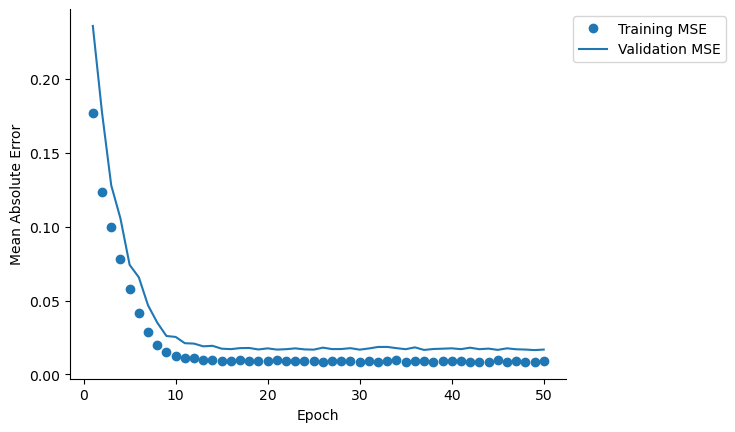

In [44]:
plot_history(improved_history, 'mse');

### Model Evaluation

In [45]:
improved_model = keras.saving.load_model(improved_model_filepath)

In [46]:
actuals, improved_predictions = get_actuals_and_predictions(
    improved_model, test_dataset, scaler)

3/3 [==============================] - 1s 6ms/step


/tmp/ipykernel_176396/3731936889.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions = np.array([float(target) for target in predictions])


In [47]:
improved_performance = compute_model_performance(
    actuals, improved_predictions, 'Improved GRU')

In [48]:
pd.concat((naive_performance, basic_performance, improved_performance))

Metric,MAE,MAPE
Model,,
Naive,9.504132,0.032435
Basic GRU,11.365637,0.035934
Improved GRU,4.069205,0.014034


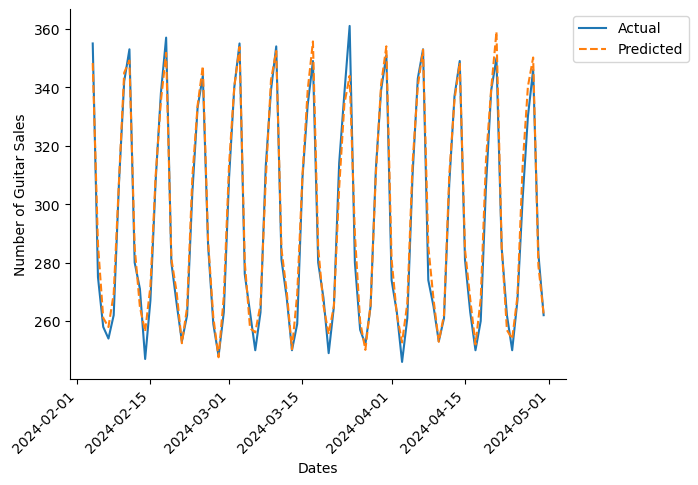

In [49]:
plot_predictions(actuals, improved_predictions,
                 df.Date[-len(basic_predictions):]);

## Task 5

### Post Modeling EDA

In [50]:
results = pd.DataFrame(index=df.Date[-len(basic_predictions):])
results.loc[:, 'actual'] = actuals
results.loc[:, 'prediction'] = improved_predictions.round()
results.loc[:, 'abs_error'] = abs(results.actual - results.prediction)

In [51]:
results = results.join(df.set_index('Date'))

#### Average Error Per Day

In [52]:
results.groupby('Day of the Week').abs_error.mean()

Day of the Week
Friday       4.583333
Monday       5.230769
Saturday     3.083333
Sunday       4.846154
Thursday     4.083333
Tuesday      3.076923
Wednesday    3.500000
Name: abs_error, dtype: float64

#### Effect of Holidays

In [53]:
results.groupby('Holidays').abs_error.mean()

Holidays
False    4.093023
True     2.000000
Name: abs_error, dtype: float64

<div class="alert alert-block alert-info">

Write 2-3 paragraphs summarizing your modeling efforts and insights. Address this report to the company's CEO, Director Monte Cristo, an esteemed data scientist. Ensure your report is concise, highlighting key achievements, challenges faced, and strategic recommendations.

*Rubric*
- **3pts** (Technical) Appropriately summarizes your machine learning findings, model performance
- **3pts** (Business) Reasonable recommendations based on your model's forecasts
</div>

#### ChatGPT Prompt

```
Hi, ChatGPT!

Can you help me create a report that summarizes my modeling effort and insights regarding the model finetuning that I did for the company I'm working with? I'd like to address it to the company's CEO, Director Monte Cristo, an esteemed data scientist. Please include the following details in the report. I've created a model that predicts the number of guitars sold in a given day.

1. Summary of the model finetuning process
- I've increased the model performance of the current GRU model from the reported MAE and MAPE value 10 and a MAPE of 3.42% to an MAE and MAPE value of 4 and 1.39%
- I've done this by improving on three things - increasing the number of epochs during training, creating a multi-layer GPU network, changing the optimizer from adam to rmsprop
- A challenge I've encountered during the finetuning process is that I'm not able to replicate well the previous GRU model due to unclear specification of number of epochs and scaling used by the previous team

2. Recommendations from the model's forecast
- Having an MAE value of 4 suggests that if we use the model's forecast, we need a buffer of around 4 guitars stocked in our shop
- I've also discovered that the model is least accurate during Mondays and Sundays
- Additionaly, during holidays, the model has better performance than days without holidays

3. Recommendations for further improvement
- Explore using a multi-variate approach including other factors such as GDP and tourist count in the model
- Check whether a lookback window of 7 days is enough, with the data that we have, we can increase this to 1 month
- Explore possibly a smaller forecasting horizon if the business process permits

Limit the report to 2-3 paragraphs.

Thank you! Hope that the report is concise and highlights the key achievements that I've written here.
```

### Modeling Report

**To: Director Monte Cristo**
**Subject: Summary of Model Finetuning for Daily Guitar Sales Forecasting**

Dear Director Monte Cristo,

I am pleased to share the results of my recent model finetuning efforts for our GRU-based daily guitar sales forecast.

The model’s performance has significantly improved, with the Mean Absolute Error (MAE) reduced from 10 to 4, and the Mean Absolute Percentage Error (MAPE) from 3.42% to 1.39%. These gains were achieved by increasing the number of training epochs, implementing a multi-layer GRU network, and switching the optimizer from Adam to RMSprop. One key challenge encountered was the lack of clarity regarding the previous model's training settings — specifically the number of epochs and data scaling procedures used, which limited the replication efforts.

Based on the improved model’s forecasts, I recommend maintaining a minimum buffer of four guitars in inventory to accommodate average prediction error. Analysis shows the model underperforms on Sundays and Mondays but is more accurate during holidays, suggesting a potential pattern in consumer behavior.

For continued enhancement, I suggest exploring a multivariate approach incorporating macroeconomic and tourism data, reevaluating our current 7-day lookback window (potentially extending it to a month), and examining the feasibility of a shorter forecasting horizon, should our operational processes allow.

Thank you! Let me know if you have further questions or concerns regarding my fine-tuning process.

    
From your favorite Data Scientist,
    
Leo Lorenzo II

## References

1. **Timeseries data loading** - https://keras.io/2/api/data_loading/timeseries/
2. **Deep learning for timeseries** - Chapter 10, Deep Learning with Python by Chollet (2nd Edition)
3. **Keras GRU layer** - https://keras.io/api/layers/recurrent_layers/gru/